# chatClassifier3
문장만 보고 누가 쓴 건지 추측해보자

In [1]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
# files.download('/content/data.txt')

Mounted at /content/drive


## Preprocessing

In [2]:
from tqdm import tqdm
import pandas as pd

def txt_to_lst(lst):
    time_period_flag = False
    with open('/content/drive/MyDrive/ColabFiles/chatClassifier3/KakaoTalkChats.txt', 'r') as f:
        for line in tqdm(f.readlines()):
            line = line.strip()

            if line[:len(start_date)]==start_date:
                time_period_flag = True

            if time_period_flag==True and line[:len(tda_end_date)]==tda_end_date:
                break

            if time_period_flag==True:
                if line[:2] == '20' and '년' in line and '월' in line and '일' in line and ('오전' in line or '오후' in line) and line.count(':') == 2:

                    index_comma = line.index(',')
                    index_colon = line.index(':', index_comma)
                    name = line[index_comma+2:index_colon-1]

                    text = line[index_colon+2:]
                    lst.append([name, text])

In [3]:
start_date = '2022년 1월 1일'
tda_end_date = '2023년 1월 1일'

train_lst = []
txt_to_lst(train_lst)
len(train_lst)

 98%|█████████▊| 3032549/3097114 [00:04<00:00, 713516.28it/s]


960588

In [4]:
train_df = pd.DataFrame(train_lst, columns=['name', 'text'])

In [5]:
counts = train_df['name'].value_counts()
counts_df = counts.sort_values(ascending=False).reset_index()
counts_df.columns = ['name', 'count']

bot_index = list(counts_df['name']).index("방장봇")
participants = list(counts_df['name'][:bot_index+1])
print(len(participants))
counts_df = counts_df[counts_df['name'].isin(participants)]

counts_df['index'] = counts_df.index
counts_df = counts_df.drop(columns=['count'])
name2index = counts_df.set_index('name').to_dict()['index']
index2name = counts_df.set_index('index').to_dict()['name']

print(name2index)
print(index2name)

62
{'爱德华/잠실르엘판매중/25': 0, '랄프': 1, '박찬홍/ 주생아/엉아들 잘부탁해~': 2, 'Dool Lee/도시빈민/외노자': 3, '원정': 4, '안정현 / 도태솔로': 5, '李在明/중앙대/인천/의원': 6, '라테라테': 7, '이상덕/울면서기도하는남쟈': 8, 'Jinyoung. woo': 9, '심언니': 10, '돌돌삼/머구/다주택': 11, 'Jihan/악성부채인생/겨울이길다': 12, 'Min Kim': 13, '정대만': 14, 'DG': 15, '이준국': 16, 'kich': 17, '오징어': 18, '최재경': 19, '지수/내년 시드 2chb 목표': 20, '촉촉': 21, '민수': 22, '리플 / 이정우': 23, '김반포': 24, '강영광': 25, '호빵': 26, '🌸슈롱': 27, '홍': 28, '지성원': 29, '송준기/망천/경자야~~': 30, '권인호': 31, 'malarka': 32, 'kim hs': 33, 'Jin': 34, '장재원': 35, '엔젤': 36, '밍기찡': 37, '곽병민': 38, '스갱🐻니니': 39, '퐝호': 40, '김동석': 41, 'Edward Jeong': 42, '최원규': 43, '박준권/서울/매일힘든남자': 44, '최주명': 45, '김민중/골프포기': 46, 'Jack Kim': 47, '김선광': 48, 'jiwon / 평촌': 49, '김종익': 50, '박경용': 51, '박용석': 52, '우천': 53, 'Dongwhane Lee': 54, '고기윤/일산': 55, '김승용': 56, 'John Perry': 57, '은경': 58, 'Myunee': 59, '박건령': 60, '방장봇': 61}
{0: '爱德华/잠실르엘판매중/25', 1: '랄프', 2: '박찬홍/ 주생아/엉아들 잘부탁해~', 3: 'Dool Lee/도시빈민/외노자', 4: '원정', 5: '안정현 / 도태솔로', 6: '李在明/중앙대/인천/의원', 7: '라테라테',

In [6]:
train_df = train_df[train_df['name'].isin(participants)]
len(train_df)

938634

In [7]:
start_date = '2023년 1월 1일'
tda_end_date = '2023년 2월 1일'

test_lst = []
txt_to_lst(test_lst)
len(test_lst)

100%|█████████▉| 3094946/3097114 [00:01<00:00, 1803616.08it/s]


53026

In [8]:
test_df = pd.DataFrame(test_lst, columns=['name', 'text'])

In [9]:
test_df = test_df[test_df['name'].isin(participants)]
len(test_df)

51303

In [10]:
with open('gom22_data.txt', 'w', encoding='utf8') as f:
    f.write('\n'.join(train_df['text']))

In [11]:
!pip install sentencepiece
import sentencepiece as spm
import csv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 15.4 MB/s eta 0:00:00


In [12]:
spm.SentencePieceTrainer.Train('--input=/content/gom22_data.txt --model_prefix=gom22_10k --vocab_size=10000 --model_type=bpe --max_sentence_length=100')

In [13]:
gom22_vocab = pd.read_csv('/content/gom22_10k.vocab', sep='\t', header=None, quoting=csv.QUOTE_NONE)
len(gom22_vocab)

10000

In [14]:
gom22_vocab[:10]

,0,1
0,<unk>,0
1,<s>,0
2,</s>,0
3,ᄏᄏ,0
4,..,-1
5,▁이,-2
6,▁사,-3
7,니다,-4
8,▁아,-5
9,ᄏᄏᄏᄏ,-6


In [15]:
gom22_vocab.sample(10)

,0,1
532,▁슈,-529
3155,▁멈춰,-3152
6933,▁생각나네요,-6930
5288,▁노잼,-5285
4452,때가,-4449
328,▁ᅮᅮ,-325
7996,첨,-7993
8991,펀,-8988
8248,충,-8245
4350,▁죽을,-4347


In [16]:
sp = spm.SentencePieceProcessor()
sp.load('/content/gom22_10k.model')

True

In [17]:
train_name = train_df['name'].values.tolist()
y_train = []
for y in train_name:
    y_train.append(name2index[y])

train_text = train_df['text'].values.tolist()
X_train = []
for X in train_text:
    X_train.append(sp.encode_as_ids(X))

print(len(X_train))
print(len(y_train))

test_name = test_df['name'].values.tolist()
y_test = []
for y in test_name:
    y_test.append(name2index[y])

test_text = test_df['text'].values.tolist()
X_test = []
for X in test_text:
    X_test.append(sp.encode_as_ids(X))

print(len(X_test))
print(len(y_test))

938634
938634
51303
51303


388
6.092774180351447


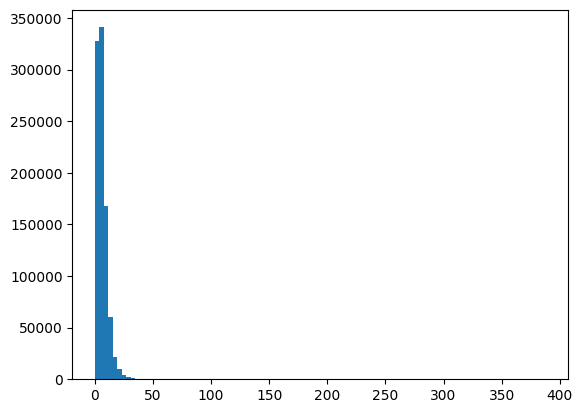

In [18]:
import matplotlib.pyplot as plt

print(max(len(X) for X in X_train))
print(sum(map(len, X_train))/len(X_train))

plt.hist([len(X) for X in X_train], bins=100)
plt.show()

In [19]:
pad_maxlen = 25

count = 0
for X in X_train:
    if len(X)<=pad_maxlen:
        count += 1
print(count/len(X_train))

0.9919255002482331


In [20]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

X_train = pad_sequences(X_train, maxlen=pad_maxlen)
print(X_train.shape)
y_train = np.array(y_train)
y_train = to_categorical(y_train, len(participants))
print(y_train.shape)

X_test = pad_sequences(X_test, maxlen=pad_maxlen)
print(X_test.shape)
y_test = np.array(y_test)
y_test = to_categorical(y_test, len(participants))
print(y_test.shape)

(938634, 25)
(938634, 62)
(51303, 25)
(51303, 62)


## Multi-kernel 1D CNN with trainable embedding layer

In [24]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -----------------------------------------------------------------------------
# Hyperparameters
embedding_dim = 128
dropout_ratio = (0.5, 0.8)
kernel_sizes = [3, 4, 5]
num_filters = 128
hidden_units = 128
# -----------------------------------------------------------------------------

model_input = Input(shape=(pad_maxlen,))

z = Embedding(len(gom22_vocab), embedding_dim, input_length=pad_maxlen, name="embedding")(model_input)
z = Dropout(dropout_ratio[0])(z)

conv_blocks = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=num_filters, kernel_size=kernel_size, padding="valid", activation="relu", strides=1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
z = Concatenate()(conv_blocks) if len(conv_blocks)>1 else conv_blocks[0]
z = Dropout(dropout_ratio[1])(z)

z = Dense(hidden_units, activation="relu")(z)

model_output = Dense(len(participants), activation="softmax")(z)

model = Model(model_input, model_output)
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 25, 128)      1280000     ['input_3[0][0]']                
                                                                                                  
 dropout_3 (Dropout)            (None, 25, 128)      0           ['embedding[0][0]']              
                                                                                                  
 conv1d_3 (Conv1D)              (None, 23, 128)      49280       ['dropout_3[0][0]']              
                                                                                            

In [25]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('gom22_MultiKernel1DCNN.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
11731/11733 [============================>.] - ETA: 0s - loss: 3.1230 - acc: 0.2059
Epoch 1: val_acc improved from -inf to 0.22451, saving model to gom22_MultiKernel1DCNN.h5
11733/11733 [==============================] - 102s 8ms/step - loss: 3.1229 - acc: 0.2059 - val_loss: 3.0218 - val_acc: 0.2245
Epoch 2/10
11724/11733 [============================>.] - ETA: 0s - loss: 2.9596 - acc: 0.2433
Epoch 2: val_acc improved from 0.22451 to 0.23120, saving model to gom22_MultiKernel1DCNN.h5
11733/11733 [==============================] - 71s 6ms/step - loss: 2.9596 - acc: 0.2433 - val_loss: 3.0018 - val_acc: 0.2312
Epoch 3/10
11732/11733 [============================>.] - ETA: 0s - loss: 2.9239 - acc: 0.2512
Epoch 3: val_acc improved from 0.23120 to 0.23709, saving model to gom22_MultiKernel1DCNN.h5
11733/11733 [==============================] - 70s 6ms/step - loss: 2.9238 - acc: 0.2512 - val_loss: 3.0202 - val_acc: 0.2371
Epoch 4/10
11733/11733 [==============================] - ET

In [26]:
loaded_model = load_model('/content/gom22_MultiKernel1DCNN.h5')
print(f"Test accuracy: {loaded_model.evaluate(X_test, y_test)[1]:.4f}")

1604/1604 [==============================] - 5s 3ms/step - loss: 2.8293 - acc: 0.2882
Test accuracy: 0.2882


## Word2Vec

In [27]:
f = open('/content/gom22_data.txt', encoding="utf8")
lines = f.read().splitlines()
len(lines)

938634

In [28]:
tokenized_sentences = []
for line in lines:
    if line:
        tokenized_sentences.append(sp.encode_as_pieces(line))
len(tokenized_sentences)

938401

In [29]:
from gensim.models import Word2Vec

gom22_word2vec = Word2Vec(tokenized_sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [30]:
gom22_word2vec.save("gom22_Word2Vec.model")
# gom22_word2vec = Word2Vec.load("/content/drive/MyDrive/ColabFiles/chatClassifier3/gom22_Word2Vec.model")

In [31]:
gom22_word2vec.wv.vectors.shape

(10265, 100)

In [36]:
len(gom22_word2vec.wv.index_to_key)

10265

In [37]:
len(gom22_vocab)

10000

In [38]:
list(gom22_vocab[0])[:20]

['<unk>',
 '<s>',
 '</s>',
 'ᄏᄏ',
 '..',
 '▁이',
 '▁사',
 '니다',
 '▁아',
 'ᄏᄏᄏᄏ',
 '▁그',
 '티콘',
 '▁이모',
 '▁이모티콘',
 '▁사진',
 '...',
 '▁선',
 '▁안',
 '▁.',
 '▁하']

In [39]:
gom22_word2vec.wv.index_to_key[:20]

['..',
 '▁이모티콘',
 '▁사진',
 '?',
 '.',
 '...',
 '이',
 '도',
 '!',
 '▁.',
 '▁',
 '은',
 '에',
 '가',
 '을',
 '는',
 '지',
 '▁아',
 '의',
 '▁선착순']

In [41]:
list(gom22_vocab[0])[len(list(gom22_vocab[0]))-20:]

['팼',
 '펐',
 '횃',
 '👋',
 '🦀',
 '̴',
 'ᅰ',
 '※',
 '、',
 'ル',
 '安',
 '我',
 '犬',
 '生',
 '盧',
 '英',
 '곗',
 '귝',
 '긎',
 '끨']

In [42]:
gom22_word2vec.wv.index_to_key[len(gom22_word2vec.wv.index_to_key)-20:]

['컫',
 '뫘',
 '옜',
 '똠',
 '냨',
 '랔',
 '솼',
 '딀',
 '😡',
 '큔',
 '튽',
 '멓',
 '죨',
 '풔',
 '츼',
 '읕',
 '킄',
 '脫',
 '궂',
 '퐌']

In [43]:
gom22_word2vec.wv.vectors[19]

array([ 1.8661261e+00, -1.8994670e-01,  4.1490898e-01,  9.4493139e-01,
       -2.6963820e+00,  2.2451186e+00, -1.1428638e+00, -9.4705774e-03,
        9.7258627e-02,  6.0421610e-01,  2.4102030e+00,  1.4860653e+00,
        9.4004142e-01,  1.1530205e+00,  1.9117935e+00,  1.1047646e+00,
        2.4195089e+00, -3.2247224e+00,  8.0063868e-01, -4.2625403e+00,
       -4.4394672e-01,  2.5672219e+00, -1.9885686e-03, -9.8984921e-01,
        1.9909072e-01,  7.2656810e-01,  4.8851427e-01, -1.6272382e+00,
        1.9331794e+00,  1.2042369e+00, -1.8283288e+00, -2.3874373e+00,
        2.5535383e+00, -1.4889388e+00, -1.6494782e+00,  4.8012441e-01,
       -1.2300828e+00,  1.0388184e+00, -3.3559507e-01, -1.0122467e+00,
        3.7347016e-01, -2.1784215e+00,  2.9325518e-01,  2.5281742e-01,
       -2.2920771e+00, -1.6991363e+00, -2.0769186e+00, -2.5534055e+00,
       -2.8518364e+00, -1.7415442e-01, -7.3132855e-01, -2.3907802e+00,
       -1.4121654e+00, -7.0070875e-01,  1.2773083e+00,  1.2124723e+00,
      

In [44]:
gom22_word2vec.wv['▁선착순']

array([ 1.8661261e+00, -1.8994670e-01,  4.1490898e-01,  9.4493139e-01,
       -2.6963820e+00,  2.2451186e+00, -1.1428638e+00, -9.4705774e-03,
        9.7258627e-02,  6.0421610e-01,  2.4102030e+00,  1.4860653e+00,
        9.4004142e-01,  1.1530205e+00,  1.9117935e+00,  1.1047646e+00,
        2.4195089e+00, -3.2247224e+00,  8.0063868e-01, -4.2625403e+00,
       -4.4394672e-01,  2.5672219e+00, -1.9885686e-03, -9.8984921e-01,
        1.9909072e-01,  7.2656810e-01,  4.8851427e-01, -1.6272382e+00,
        1.9331794e+00,  1.2042369e+00, -1.8283288e+00, -2.3874373e+00,
        2.5535383e+00, -1.4889388e+00, -1.6494782e+00,  4.8012441e-01,
       -1.2300828e+00,  1.0388184e+00, -3.3559507e-01, -1.0122467e+00,
        3.7347016e-01, -2.1784215e+00,  2.9325518e-01,  2.5281742e-01,
       -2.2920771e+00, -1.6991363e+00, -2.0769186e+00, -2.5534055e+00,
       -2.8518364e+00, -1.7415442e-01, -7.3132855e-01, -2.3907802e+00,
       -1.4121654e+00, -7.0070875e-01,  1.2773083e+00,  1.2124723e+00,
      

In [45]:
gom22_word2vec.wv.most_similar('▁선착순', topn=10)

[('▁시작합니다', 0.5552059412002563),
 ('▁선물을', 0.5508813261985779),
 ('▁늦지', 0.542372465133667),
 ('▁기회는', 0.534000813961029),
 ('분간', 0.5311708450317383),
 ('▁종료됩니다', 0.5190539360046387),
 ('▁보냈습니다', 0.5137362480163574),
 ('▁않았어요', 0.5063295364379883),
 ('▁게임을', 0.49447911977767944),
 ('▁장오픈', 0.4536493122577667)]

In [46]:
gom22_word2vec.wv.most_similar('▁존예디컵', topn=10)

[('▁남친', 0.7010402679443359),
 ('▁동생', 0.6910679936408997),
 ('▁여친', 0.6905515789985657),
 ('▁가족', 0.6805916428565979),
 ('▁남편', 0.6728658676147461),
 ('▁부모님', 0.6604858636856079),
 ('▁여사친', 0.6370567679405212),
 ('▁여자', 0.6136230826377869),
 ('▁지인', 0.598432719707489),
 ('▁슈렁', 0.5925098657608032)]

In [47]:
for i in list(gom22_vocab[0]):
    if i not in gom22_word2vec.wv.index_to_key:
        print(i)

<unk>
<s>
</s>
〈˂
˃̣̣̣̣
〈˂̣̣̣̣
˃̣̣̣̣〈˂̣̣̣̣
잠실르엘
德华
판매중
▁)(
길다
악성
겨울이
악성부채
REAL
하는남쟈
기도하는남쟈
울면서
▁굉
在明
▁천천
̣
〈
德
华
爱
왤
릎
옙
굉
明
튭
볍


In [48]:
for i in gom22_word2vec.wv.index_to_key:
    if i not in list(gom22_vocab[0]):
        print(i)

▲
🙋
♂
♀
∼
읒
늗
‧
꿧
짊
슌
윅
엏
뻬
츌
늉
핡
롷
₩
뀝
😊
켤
😇
짴
뗐
츅
뎨
츕
샊
🐁
춌
줴
캥
比
읺
텄
◆
뢀
촟
핬
싳
슦
뮥
퓟
く
겧
⭐
냑
텡
큭
땟
뉜
톳
쿸
욯
섷
쉥
쇽
샾
죙
폄
돰
쇳
뜁
샜
잿
츨
휀
떙
슫
듲
๐
엡
옼
휜
😄
쳡
돨
쭘
◇
핱
큠
챕
軍
샇
맠
웻
갗
🤢
몆
뭥
돤
핳
🏃
故
뎡
횐
휙
횬
앟
뉨
햌
뭠
멎
끕
텤
싷
넜
팤
뷁
윕
🐽
😥
냘
곺
🌟
갹
🙂
も
ᅪ
힠
🙄
섕
펭
곀
듷
굇
잴
펍
れ
뗏
年
뭅
밨
🍗
뗘
뱁
졷
↗
쌋
쉈
벵
돜
솝
쐐
튤
□
귁
꽌
옅
쾃
ね
°
눤
톈
せ
휑
【
굔
뽱
떫
앀
콬
췩
묫
겎
쑹
눴
よ
묽
쟀
띈
社
픙
됀
켱
▷
닢
켭
죸
얐
重
듄
흗
뱔
森渚平
깹
쳬
쫍
찣
뗌
썪
🔥
깈
큥
핟
웤
핞
슺
뵀
헸
맜
家
믐
탰
짇
얶
發
먕
씟
섣
찯
쒔
셴
さ
쏵
흄
묠
컄
끜
男
겓
돝
め
띱
궄
귣
죗
🛢
낏
△
괨
툐
윰
큿
얒
金護彬
죈
꿘
쒜
챴
😮
』
렝
《
됭
『
윸
헀
훡
そ
짛
섲
솃
뜌
빝
思
✅
졔
냣
곯
獨
겤
쑨
섀
봬
닞
–
롄
멌
罪宗
맄
💩
】
멨
뉑
非
볨
젔
컫
뫘
옜
똠
냨
랔
솼
딀
😡
큔
튽
멓
죨
풔
츼
읕
킄
脫
궂
퐌


In [49]:
vocab_size = len(list(gom22_vocab[0]))
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for index, word in enumerate(list(gom22_vocab[0])):
    if word in list(gom22_word2vec.wv.index_to_key):
        embedding_matrix[index] = gom22_word2vec.wv[word]
    elif word == '<unk>':
        embedding_matrix[index] = np.zeros(embedding_dim)
    else:
        embedding_matrix[index] = np.random.normal(0, 1, embedding_dim)

embedding_matrix.shape

(10000, 100)

In [53]:
list(gom22_vocab[0])[:5]

['<unk>', '<s>', '</s>', 'ᄏᄏ', '..']

In [54]:
embedding_matrix[:5]

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [56]:
gom22_word2vec.wv['..']

array([-0.19191842, -0.22178201, -0.03020994,  0.00207273,  0.3623597 ,
        0.3612092 ,  1.2586375 ,  0.05813965,  0.8341868 ,  0.37227994,
        0.02765941, -0.42262036, -1.0011021 ,  0.12922162,  0.60120505,
        0.22482441, -0.7627126 ,  0.99102783, -0.34418896, -0.5577665 ,
        0.68613094, -0.8939343 , -0.02952634,  0.66446245, -0.90009457,
        0.02302654,  0.18436508, -0.63869804,  0.20978005, -0.3651056 ,
       -0.13555008, -0.50426984, -0.16458191,  0.3319254 , -0.14535391,
        0.9967491 ,  0.11916872,  0.34191933,  0.5901479 , -0.21383034,
        0.37099293, -0.09427433, -0.36051157,  0.62456983,  0.08341688,
        0.6075781 ,  0.8686331 ,  0.7781166 ,  1.6225568 ,  0.39152265,
        0.37301257,  0.21235079,  0.43642566,  0.27138895, -0.1994249 ,
        0.29213136,  0.2901227 , -0.4853212 , -0.4251429 , -0.26705554,
        0.95642895,  1.1214485 , -0.6725511 , -1.4937422 ,  0.37257013,
       -0.36845016,  0.40252274,  0.6941035 ,  0.16501458, -0.54

## Multi-kernel 1D CNN with pretrained Word2Vec embedding vectors

In [57]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Concatenate
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -----------------------------------------------------------------------------
# Hyperparameters
kernel_sizes = [2, 3, 5]
num_filters = 512
dropout_ratio = 0.5
# -----------------------------------------------------------------------------

model_input = Input(shape=(pad_maxlen,))

z = Embedding(vocab_size, 
              embedding_dim, 
              weights=[embedding_matrix], # pretrained embedding vectors
              input_length=pad_maxlen, 
              trainable=False)(model_input)

conv_blocks = []
for kernel_size in kernel_sizes:
    conv = Conv1D(filters=num_filters, kernel_size=kernel_size, padding="valid", activation="relu", strides=1)(z)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)
z = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
z = Dropout(dropout_ratio)(z)

model_output = Dense(len(participants), activation='softmax')(z)

model = Model(model_input, model_output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 25)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 25, 100)      1000000     ['input_4[0][0]']                
                                                                                                  
 conv1d_6 (Conv1D)              (None, 24, 512)      102912      ['embedding[0][0]']              
                                                                                                  
 conv1d_7 (Conv1D)              (None, 23, 512)      154112      ['embedding[0][0]']              
                                                                                            

In [58]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('gom22_MultiKernel1DCNN_Word2Vec.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
11733/11733 [==============================] - ETA: 0s - loss: 3.1285 - acc: 0.2096
Epoch 1: val_acc improved from -inf to 0.22151, saving model to gom22_MultiKernel1DCNN_Word2Vec.h5
11733/11733 [==============================] - 64s 5ms/step - loss: 3.1285 - acc: 0.2096 - val_loss: 3.0228 - val_acc: 0.2215
Epoch 2/10
11730/11733 [============================>.] - ETA: 0s - loss: 2.9675 - acc: 0.2350
Epoch 2: val_acc improved from 0.22151 to 0.23174, saving model to gom22_MultiKernel1DCNN_Word2Vec.h5
11733/11733 [==============================] - 61s 5ms/step - loss: 2.9675 - acc: 0.2350 - val_loss: 2.9870 - val_acc: 0.2317
Epoch 3/10
11730/11733 [============================>.] - ETA: 0s - loss: 2.9203 - acc: 0.2441
Epoch 3: val_acc improved from 0.23174 to 0.23907, saving model to gom22_MultiKernel1DCNN_Word2Vec.h5
11733/11733 [==============================] - 63s 5ms/step - loss: 2.9203 - acc: 0.2441 - val_loss: 2.9751 - val_acc: 0.2391
Epoch 4/10
11729/11733 [==========

In [59]:
loaded_model = load_model('/content/gom22_MultiKernel1DCNN_Word2Vec.h5')
print(f"Test accuracy: {loaded_model.evaluate(X_test, y_test)[1]:.4f}")

1604/1604 [==============================] - 5s 3ms/step - loss: 2.7935 - acc: 0.2874
Test accuracy: 0.2874


## LSTM with pretrained Word2Vec embedding vectors

In [60]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# -----------------------------------------------------------------------------
# Hyperparameters
hidden_units = 128
# -----------------------------------------------------------------------------

model = Sequential()

model.add(Embedding(vocab_size, 
                    embedding_dim, 
                    weights=[embedding_matrix], # pretrained embedding vectors
                    input_length=pad_maxlen, 
                    trainable=False))

model.add(LSTM(hidden_units))

model.add(Dense(len(participants), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_5 (Dense)             (None, 62)                7998      
                                                                 
Total params: 1,125,246
Trainable params: 125,246
Non-trainable params: 1,000,000
_________________________________________________________________


In [61]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('gom22_LSTM_Word2Vec.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
11730/11733 [============================>.] - ETA: 0s - loss: 2.8712 - acc: 0.2539
Epoch 1: val_acc improved from -inf to 0.24765, saving model to gom22_LSTM_Word2Vec.h5
11733/11733 [==============================] - 65s 5ms/step - loss: 2.8712 - acc: 0.2539 - val_loss: 2.8808 - val_acc: 0.2476
Epoch 2/10
11729/11733 [============================>.] - ETA: 0s - loss: 2.6998 - acc: 0.2900
Epoch 2: val_acc improved from 0.24765 to 0.26817, saving model to gom22_LSTM_Word2Vec.h5
11733/11733 [==============================] - 62s 5ms/step - loss: 2.6999 - acc: 0.2900 - val_loss: 2.8404 - val_acc: 0.2682
Epoch 3/10
11725/11733 [============================>.] - ETA: 0s - loss: 2.6414 - acc: 0.3037
Epoch 3: val_acc did not improve from 0.26817
11733/11733 [==============================] - 63s 5ms/step - loss: 2.6414 - acc: 0.3037 - val_loss: 2.8195 - val_acc: 0.2634
Epoch 4/10
11733/11733 [==============================] - ETA: 0s - loss: 2.6069 - acc: 0.3116
Epoch 4: val_acc di

In [62]:
loaded_model = load_model('/content/gom22_LSTM_Word2Vec.h5')
print(f"Test accuracy: {loaded_model.evaluate(X_test, y_test)[1]:.4f}")

1604/1604 [==============================] - 6s 3ms/step - loss: 2.7265 - acc: 0.3029
Test accuracy: 0.3029


## Transformer with trainable embedding layer

In [63]:
import tensorflow as tf

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim)
        self.key_dense = tf.keras.layers.Dense(embedding_dim)
        self.value_dense = tf.keras.layers.Dense(embedding_dim)
        self.dense = tf.keras.layers.Dense(embedding_dim)

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # MultiHeadAttention
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # Position-Wise Feed Forward
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

In [67]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions
        
# -----------------------------------------------------------------------------
# Hyperparameters
num_heads = 5 # Number of Attention Heads
dff = 32 # Size of Dense layer in the Position-wise Feed Forward layer
# -----------------------------------------------------------------------------

inputs = tf.keras.layers.Input(shape=(pad_maxlen,))

embedding_layer = TokenAndPositionEmbedding(pad_maxlen, vocab_size, embedding_dim)
z = embedding_layer(inputs)

transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
z = transformer_block(z)

z = tf.keras.layers.GlobalAveragePooling1D()(z)
z = tf.keras.layers.Dropout(0.1)(z)

z = tf.keras.layers.Dense(20, activation="relu")(z)
z = tf.keras.layers.Dropout(0.1)(z)

outputs = tf.keras.layers.Dense(len(participants), activation="softmax")(z)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile("adam", "categorical_crossentropy", metrics=['acc'])
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 25)]              0         
                                                                 
 token_and_position_embeddin  (None, 25, 100)          1002500   
 g_1 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_1 (Transf  (None, 25, 100)          47332     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 100)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_12 (Dropout)        (None, 100)               0   

In [68]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('gom22_Transformer.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
11731/11733 [============================>.] - ETA: 0s - loss: 2.9565 - acc: 0.2506
Epoch 1: val_acc improved from -inf to 0.26282, saving model to gom22_Transformer.h5
11733/11733 [==============================] - 159s 13ms/step - loss: 2.9565 - acc: 0.2506 - val_loss: 2.9039 - val_acc: 0.2628
Epoch 2/10
11731/11733 [============================>.] - ETA: 0s - loss: 2.7374 - acc: 0.3002
Epoch 2: val_acc improved from 0.26282 to 0.27996, saving model to gom22_Transformer.h5
11733/11733 [==============================] - 118s 10ms/step - loss: 2.7374 - acc: 0.3002 - val_loss: 2.8652 - val_acc: 0.2800
Epoch 3/10
11731/11733 [============================>.] - ETA: 0s - loss: 2.6588 - acc: 0.3185
Epoch 3: val_acc improved from 0.27996 to 0.28943, saving model to gom22_Transformer.h5
11733/11733 [==============================] - 113s 10ms/step - loss: 2.6588 - acc: 0.3185 - val_loss: 2.8456 - val_acc: 0.2894
Epoch 4/10
11730/11733 [============================>.] - ETA: 0s - lo

In [69]:
print(f"Test accuracy: {model.evaluate(X_test, y_test)[1]:.4f}")

1604/1604 [==============================] - 7s 4ms/step - loss: 2.6822 - acc: 0.3265
Test accuracy: 0.3265


## Transformer with pretrained Word2Vec embedding vectors

In [64]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = Embedding(vocab_size, 
                                   embedding_dim, 
                                   weights=[embedding_matrix], # pretrained embedding vectors
                                   input_length=pad_maxlen, 
                                   trainable=False)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

# -----------------------------------------------------------------------------
# Hyperparameters
num_heads = 5 # Number of Attention Heads
dff = 32 # Size of Dense layer in the Position-wise Feed Forward layer
# -----------------------------------------------------------------------------

inputs = tf.keras.layers.Input(shape=(pad_maxlen,))

embedding_layer = TokenAndPositionEmbedding(pad_maxlen, vocab_size, embedding_dim)
z = embedding_layer(inputs)

transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
z = transformer_block(z)

z = tf.keras.layers.GlobalAveragePooling1D()(z)
z = tf.keras.layers.Dropout(0.1)(z)

z = tf.keras.layers.Dense(20, activation="relu")(z)
z = tf.keras.layers.Dropout(0.1)(z)

outputs = tf.keras.layers.Dense(len(participants), activation="softmax")(z)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.compile("adam", "categorical_crossentropy", metrics=['acc'])
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 25)]              0         
                                                                 
 token_and_position_embeddin  (None, 25, 100)          1002500   
 g (TokenAndPositionEmbeddin                                     
 g)                                                              
                                                                 
 transformer_block (Transfor  (None, 25, 100)          47332     
 merBlock)                                                       
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_8 (Dropout)         (None, 100)               0   

In [65]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('gom22_Transformer_Word2Vec.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.2, callbacks=[es, mc])

Epoch 1/10
11733/11733 [==============================] - ETA: 0s - loss: 3.1017 - acc: 0.2067
Epoch 1: val_acc improved from -inf to 0.20644, saving model to gom22_Transformer_Word2Vec.h5
11733/11733 [==============================] - 116s 9ms/step - loss: 3.1017 - acc: 0.2067 - val_loss: 3.0762 - val_acc: 0.2064
Epoch 2/10
11731/11733 [============================>.] - ETA: 0s - loss: 2.9897 - acc: 0.2286
Epoch 2: val_acc improved from 0.20644 to 0.22170, saving model to gom22_Transformer_Word2Vec.h5
11733/11733 [==============================] - 109s 9ms/step - loss: 2.9897 - acc: 0.2286 - val_loss: 3.0576 - val_acc: 0.2217
Epoch 3/10
11732/11733 [============================>.] - ETA: 0s - loss: 2.9546 - acc: 0.2372
Epoch 3: val_acc did not improve from 0.22170
11733/11733 [==============================] - 108s 9ms/step - loss: 2.9546 - acc: 0.2372 - val_loss: 3.0583 - val_acc: 0.2170
Epoch 4/10
11733/11733 [==============================] - ETA: 0s - loss: 2.9341 - acc: 0.2423
Ep

In [66]:
print(f"Test accuracy: {model.evaluate(X_test, y_test)[1]:.4f}")

1604/1604 [==============================] - 6s 4ms/step - loss: 2.8730 - acc: 0.2699
Test accuracy: 0.2699


## Inference

In [287]:
import random

r = random.randint(0, len(X_test))
X = X_test[r]
X_lst = X.tolist()
pieces = []
for i in X_lst:
    if i!=0:
        pieces.append(sp.IdToPiece(i))

sentence = ''.join(i for i in pieces)
sentence = sentence.replace('▁', ' ')
if sentence[0]==' ':
    sentence = sentence[1:]
print(sentence)

X = np.expand_dims(X, axis=0)
pred = model.predict(X)
# max_idx = np.argmax(pred)
five_idxs = np.argsort(pred)
five_idxs = five_idxs.tolist()
five_idxs = five_idxs[0]
five_idxs = five_idxs[::-1]
five_idxs = five_idxs[:5]

for rank, idx in enumerate(five_idxs):
    print(f'{rank+1}) {index2name[idx]}: {pred[0][idx]*100:.2f}%')

안먹으면.. 육처넌도 아낄수잇을텐데..
1/1 [==============================] - 0s 22ms/step
1) 돌돌삼/머구/다주택: 96.49%
2) 원정: 1.59%
3) 지수/내년 시드 2chb 목표: 0.90%
4) 홍: 0.23%
5) 우천: 0.12%


In [135]:
sentence = '존예디컵 여름 풀파티 하기 딱이긴 하겠네요'
print(sentence)

sentence = [sp.encode_as_ids(sentence)]
sentence = pad_sequences(sentence, maxlen=pad_maxlen)
# print(sentence)
sentence_lst = sentence.tolist()
pieces = []
for i in sentence_lst[0]:
    pieces.append(sp.IdToPiece(i))
sentence_joined = ''.join(i for i in pieces)
# print(sentence_joined)
pred = model.predict(sentence)
# max_idx = np.argmax(pred)
five_idxs = np.argsort(pred)
five_idxs = five_idxs.tolist()
five_idxs = five_idxs[0]
five_idxs = five_idxs[::-1]
five_idxs = five_idxs[:5]

for rank, idx in enumerate(five_idxs):
    print(f'{rank+1}) {index2name[idx]}: {pred[0][idx]*100:.2f}%')

존예디컵 여름 풀파티 하기 딱이긴 하겠네요
1/1 [==============================] - 0s 22ms/step
1) 爱德华/잠실르엘판매중/25: 96.40%
2) 랄프: 0.43%
3) 정대만: 0.41%
4) Jinyoung. woo: 0.35%
5) 심언니: 0.27%
